In [1]:
## Imports

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

sys.path.append("../.")

import handybeam_core
import handybeam_core.world
import handybeam_core.tx_array_library
import handybeam_core.tx_array
import handybeam_core.visualise
import handybeam_core.samplers.hexagonal_sampler
from handybeam_core.solver import Solver

matplotlib.rcParams['figure.figsize'] = [20, 10]


C:\Users\JerzyDziewierz\AppData\Local\conda\conda\envs\handybeam\lib\site-packages\vispy\visuals\isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


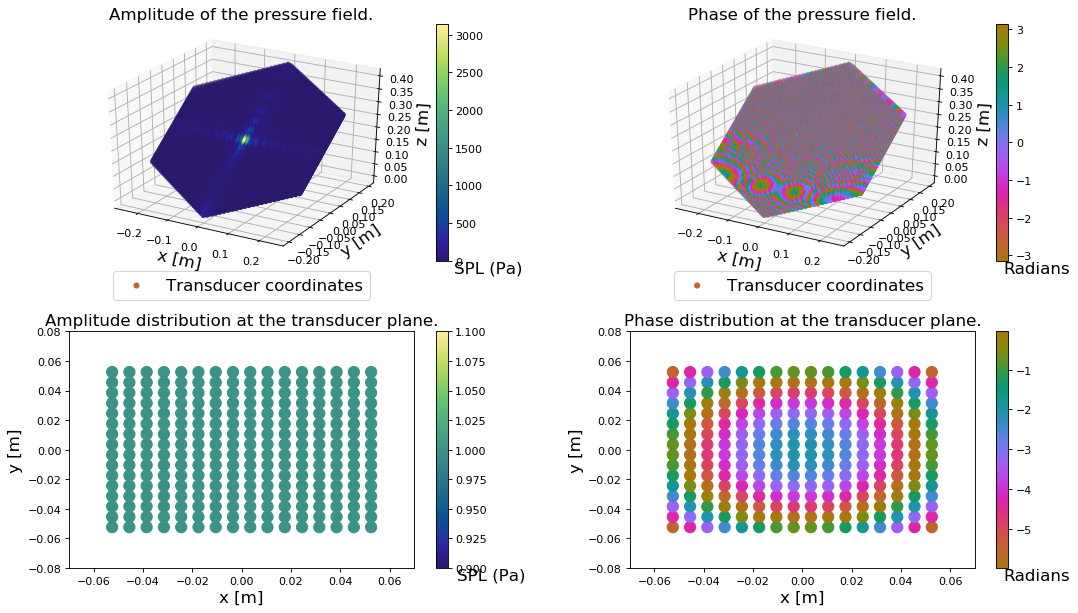

In [2]:
# Initialise the world 

world = handybeam_core.world.World()

# Initialise a solver

solver = Solver(parent = world)

# Add a transmitter array to the world

world.tx_array = handybeam_core.tx_array_library.rectilinear(parent = world)

# Instruct the solver to solve for the activation coefficients

solver.single_focus_solver(x_focus = 0, y_focus = 0, z_focus = 200e-3)

# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.2

# Set grid extent around the origin.

grid_extent_around_origin = 0.1

# Specify the vector normal to the sampling grid 

norm_vector = np.array((0,1,-1))

# Specify a vector that is orthogonal to this vector ( this will be parallel to one axis of the sampling grid)

par_vector = np.array((0,1,1))

# Add a rectilinear sampling grid to the world

hex_sampler = world.add_sampler(handybeam_core.samplers.hexagonal_sampler.HexagonalSampler( parent = world,
                                                                    origin = np.array((0,0,200e-3)),
                                                                    normal_vector = norm_vector,
                                                                    parallel_vector = par_vector,
                                                                    grid_spacing_per_wavelength = grid_spacing_per_wavelength,
                                                                    grid_extent_around_origin = grid_extent_around_origin))
# Propagate the acoustic field

world.propagate()

# Visualise the result

hex_sampler.visualise_all_in_one()
